In [65]:
# Import Library
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm   
from scipy.stats import spearmanr, kendalltau, chi2
from scipy.stats import entropy

# Set the global font to Times New Roman.
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.unicode_minus'] = False


### Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau, entropy
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] 
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns

In [3]:
# Load File
file_path = "merged_yearly_stock_data_all.csv"
All_Stock_Info = pd.read_csv(file_path, low_memory=False)
print(All_Stock_Info.head())

   Year  stock_code    market_cap  price_day_return  Price_book_ratio  证券简称  \
0  2005           1  8.546441e+09          0.000718               NaN  平安银行   
1  2005           2  8.973876e+09          0.117611               NaN   万科A   
2  2005           4  2.098388e+08         -0.159844               NaN  国华网安   
3  2005           6  6.575989e+08          0.050141               NaN  深振业A   
4  2005           7  2.868370e+08          0.040888               NaN   全新好   

        上市日期  摘牌日期  所属Wind行业代码(2004) [行业级别] 一级行业  \
0   4/3/1991   NaN                            40   
1  1/29/1991   NaN                            60   
2  12/1/1990   NaN                            45   
3  4/27/1992   NaN                            60   
4  4/13/1992   NaN                            25   

   所属Wind行业代码(2004) [行业级别] 二级行业  所属Wind行业代码(2004) [行业级别] 三级行业  \
0                          4010                        401010   
1                          6010                        601020   
2                

In [4]:
# Industry code with name
# 定义映射表（一级行业代码 -> 中文行业名）
industry_map = {
    10: "10 Energy",
    15: "15 Materials",
    20: "20 Industrials",
    25: "25 Consumer Discretionary",
    30: "30 Consumer Staples",
    35: "35 Health Care",
    40: "40 Financials",
    45: "45 Information Technology",
    50: "50 Telecommunication Services",
    55: "55 Utilities",
    60: "60 Real Estate"
}

# Add a new column in df: Chinese names of first-level industries
All_Stock_Info["一级行业名称"] = All_Stock_Info["所属Wind行业代码(2004) [行业级别] 一级行业"].map(industry_map)


In [5]:
# Overall coverage level coverage ratio
All_Stock_Info['有ESG评级'] = All_Stock_Info['ESG_Score'].notna()


# 包含ESG评级的公司：Firms Including ESG Ratings 
ESG_Stock_Info = All_Stock_Info[All_Stock_Info['有ESG评级'] == True]

### ESG Coverage on Stock Level, and Industry Level

#### Overall ESG Coverage Ratio

In [6]:
# Calculate overall proportion
overall_coverage = All_Stock_Info['有ESG评级'].mean()
print("Overall ESG coverage：{:.2%}".format(overall_coverage))


Overall ESG coverage：44.49%


#### Industry ESG Coverage Ratio

In [9]:
# Industry Coverage Level 
#Grouped by primary industry code, calculate the proportion of industries with ESG_Score.
industry_coverage = (
    All_Stock_Info.groupby("一级行业名称")['有ESG评级']
      .mean()
      .reset_index()
      .rename(columns={"has_esg": "ESG_Coverage"}))

print("\nIndustry coverage ratio：")
industry_coverage.columns = ["First Level Industry", "Have ESG Score"]
print(industry_coverage)


Industry coverage ratio：
             First Level Industry  Have ESG Score
0                       10 Energy        0.650617
1                    15 Materials        0.481439
2                  20 Industrials        0.428281
3       25 Consumer Discretionary        0.467552
4             30 Consumer Staples        0.497683
5                  35 Health Care        0.417248
6                   40 Financials        0.520661
7       45 Information Technology        0.351297
8   50 Telecommunication Services        0.331250
9                    55 Utilities        0.596691
10                 60 Real Estate        0.761000


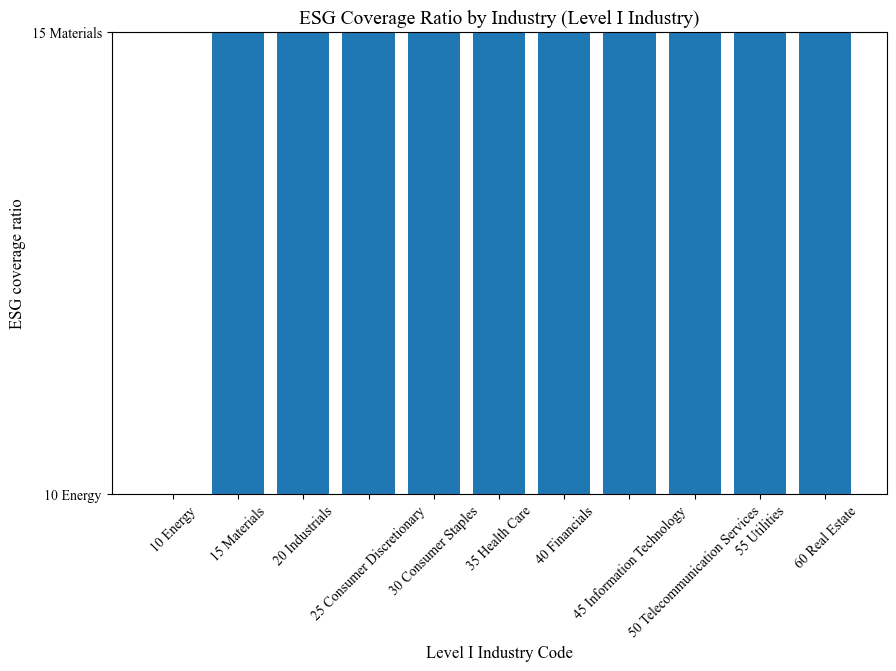

In [19]:
# To prevent garbled characters for the negative sign

# Draw a bar chart
plt.figure(figsize=(10,6))
plt.bar(industry_coverage["First Level Industry"].astype(str),
        industry_coverage["First Level Industry"])

plt.title("ESG Coverage Ratio by Industry (Level I Industry)", fontsize=14)
plt.xlabel("Level I Industry Code", fontsize=12)
plt.ylabel("ESG coverage ratio", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


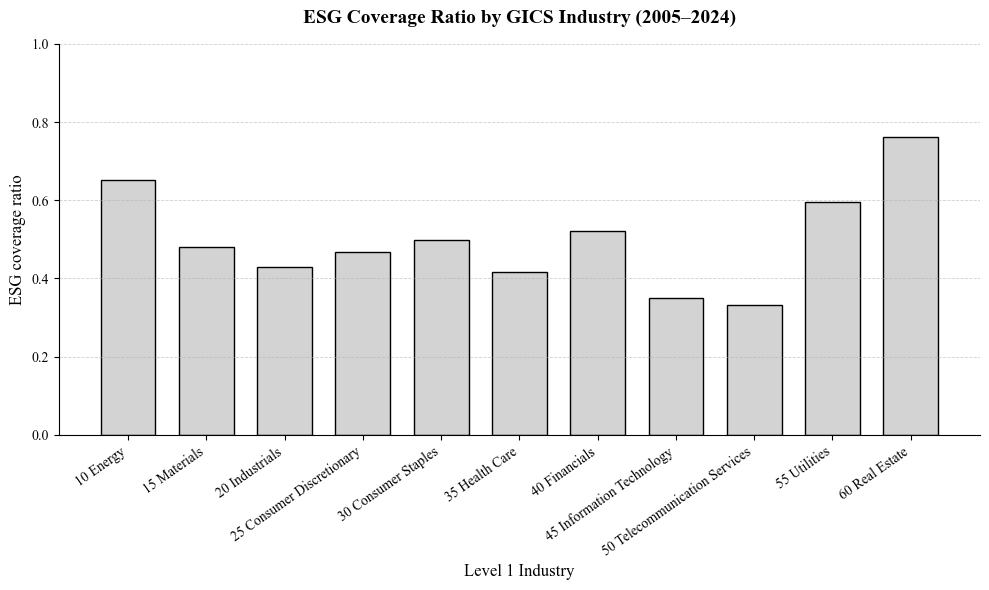

In [41]:
# Style 2 
# Create graphics
plt.figure(figsize=(10,6))
bars = plt.bar(
    industry_coverage["First Level Industry"].astype(str),
    industry_coverage["Have ESG Score"],
    color="lightgray",  
    edgecolor="black",
    width=0.7
)


# Chart titles and axis labels
plt.title("ESG Coverage Ratio by GICS Industry (2005–2024)", 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Level 1 Industry", fontsize=12)
plt.ylabel("ESG coverage ratio", fontsize=12)

# X-axis text optimization: italics, rotation, and enhancement.
plt.xticks(rotation=35, ha='right', fontsize=10)

# y-axis range and grid lines
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

# Remove the top and right borders to make the image cleaner.
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

# Adjust the layout to prevent text from being cropped.
plt.tight_layout()

# Display graphics
plt.savefig("Figure1_ESG_Coverage_Ratio.png", dpi=600, bbox_inches='tight')
plt.show()


#### Yearly ESG Coverage Ratio

In [24]:
# Different Year's Coverage Ratio
year_industry_coverage = (
    All_Stock_Info
      .groupby(["Year"])['有ESG评级']   
      .mean()
      .reset_index()
      .rename(columns={'有ESG评级': 'ESG_Coverage'})
)

# print("\nYearly Industry coverage ratio：")
# print(year_industry_coverage)


Yearly Industry coverage ratio：
    Year  ESG_Coverage
0   2005      0.000000
1   2006      0.000000
2   2007      0.275020
3   2008      0.286446
4   2009      0.313633
5   2010      0.379039
6   2011      0.425138
7   2012      0.449370
8   2013      0.459023
9   2014      0.481875
10  2015      0.520063
11  2016      0.581235
12  2017      0.651259
13  2018      0.671518
14  2019      0.717349
15  2020      0.821991
16  2021      0.907750
17  2022      0.954563
18  2023      0.000000
19  2024      0.000000


#### Different Year's Industry Coverage Ratio

In [34]:
year_industry_coverage = (
    All_Stock_Info
      .groupby(["Year", "一级行业名称"])['有ESG评级']   
      .mean()
      .reset_index()
      .rename(columns={'有ESG评级': 'ESG_Coverage', '一级行业名称': 'First_Level_Industry'}))

coverage_trend_table = year_industry_coverage.pivot(
    index="Year",
    columns="First_Level_Industry",
    values="ESG_Coverage"
)

print("Different Year's Industry Coverage Ratio：")
print(coverage_trend_table)


Different Year's Industry Coverage Ratio：
First_Level_Industry  10 Energy  15 Materials  20 Industrials  \
Year                                                            
2005                   0.000000      0.000000        0.000000   
2006                   0.000000      0.000000        0.000000   
2007                   0.592593      0.326478        0.239082   
2008                   0.617284      0.349614        0.250185   
2009                   0.641975      0.370180        0.282013   
2010                   0.691358      0.451157        0.350111   
2011                   0.753086      0.489717        0.399704   
2012                   0.765432      0.511568        0.420429   
2013                   0.777778      0.515424        0.430052   
2014                   0.790123      0.538560        0.458919   
2015                   0.839506      0.569961        0.503693   
2016                   0.888889      0.632863        0.567208   
2017                   0.901235      0.684211   

C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


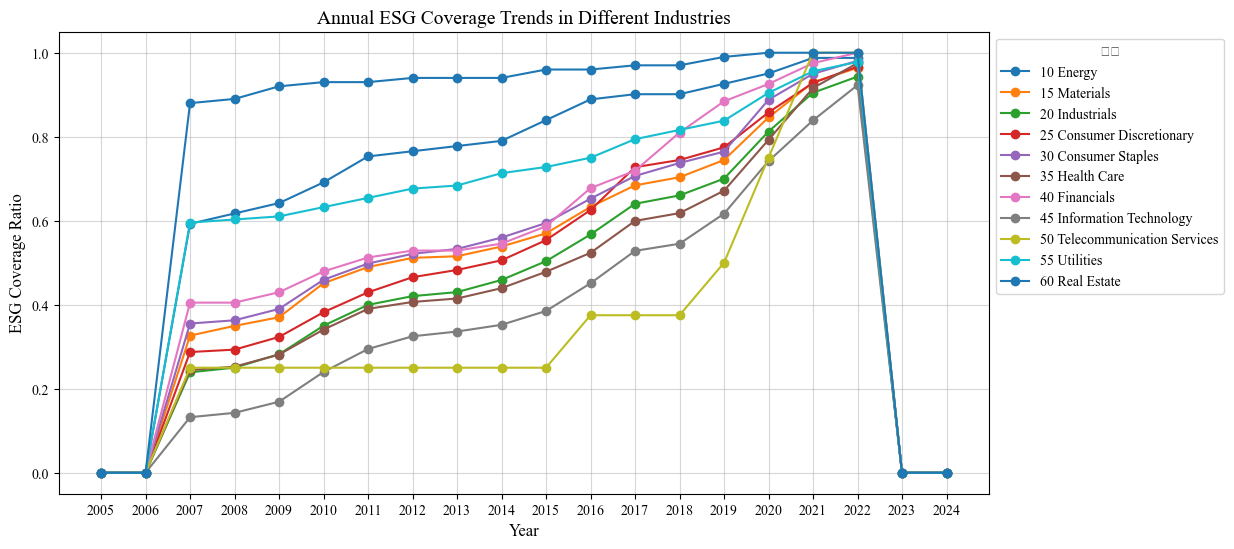

In [35]:
# Style 1
plt.figure(figsize=(12,6))
for col in coverage_trend_table.columns:
    plt.plot(coverage_trend_table.index, coverage_trend_table[col], marker="o", label=col)

plt.title("Annual ESG Coverage Trends in Different Industries", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("ESG Coverage Ratio", fontsize=12)
plt.legend(title="行业", bbox_to_anchor=(1, 1), loc="upper left")
plt.grid(alpha=0.5)
plt.xticks(ticks=coverage_trend_table.index, labels=coverage_trend_table.index.astype(int))


plt.show()

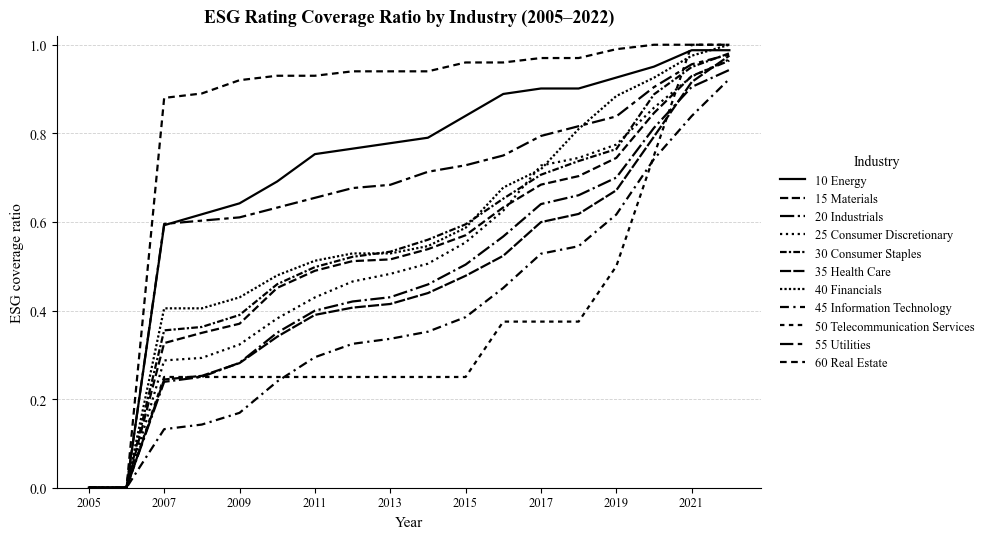

In [66]:
# Style 2
# If 2023/2024 is a missing 0, replace it with NaN 
# (to avoid a "plunge" in the graph).
df_plot = coverage_trend_table.copy()
if np.issubdtype(df_plot.index.dtype, np.number):
    mask_recent = df_plot.index >= 2023
else:
    mask_recent = df_plot.index.astype(int) >= 2023
df_plot.loc[mask_recent] = df_plot.loc[mask_recent].replace(0, np.nan)

# Linear loop
linestyles = ["-", "--", "-.", ":", (0,(3,1,1,1)), (0,(5,1)), (0,(1,1)),
              (0,(4,2,1,2)), (0,(2,2)), (0,(6,2,2,2)), (0,(3,2))]

fig, ax = plt.subplots(figsize=(10,5.5))

for i, col in enumerate(df_plot.columns):
    ax.plot(
        df_plot.index, df_plot[col],
        linestyle=linestyles[i % len(linestyles)],
        linewidth=1.6, marker=None, label=str(col), color="black"
    )

# Axis and Grid
ax.set_title("ESG Rating Coverage Ratio by Industry (2005–2022)", 
             fontsize=13, fontweight="bold", pad=10)
ax.set_xlabel("Year", fontsize=11)
ax.set_ylabel("ESG coverage ratio", fontsize=11)
ax.set_ylim(0, 1.02)

# x-axis scale (for a longer period of time, each scale mark is placed every two years for clarity).
years = df_plot.index.astype(int)
xticks = np.arange(years.min(), min(years.max(), 2022) + 1, 2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=9)

ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

# Remove the top/right border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Examples: external, single-column, compact
leg = ax.legend(title="Industry", loc="center left", bbox_to_anchor=(1.01, 0.5),
                frameon=False, fontsize=9)
if leg.get_title():
    leg.get_title().set_fontsize(10)

fig.tight_layout()
plt.show()


C:\Users\Vicky\AppData\Local\Temp\ipykernel_72456\2901362862.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Greys")


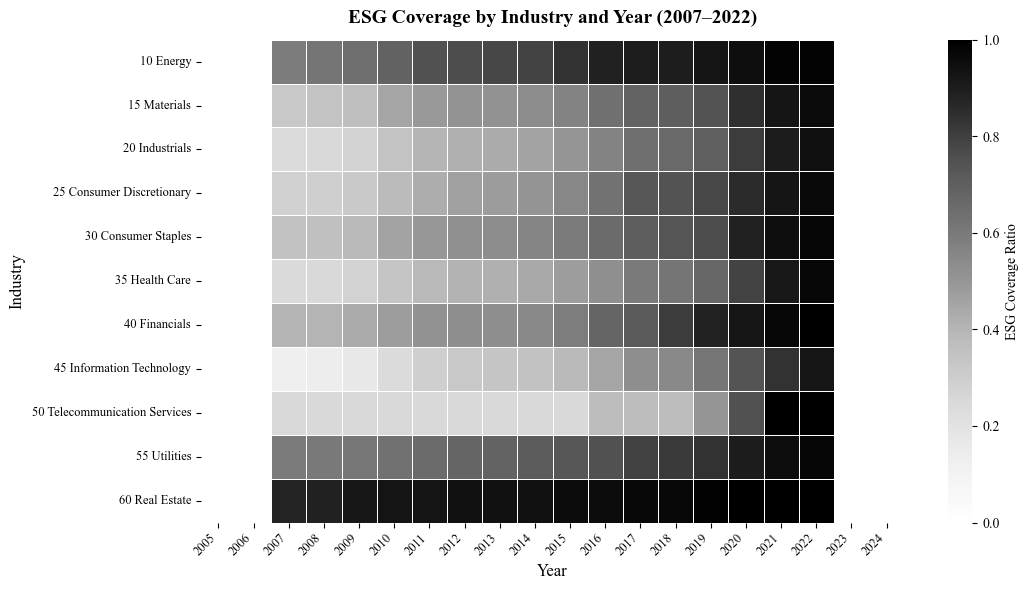

In [67]:
# df_heatmap: A pivot table for industry × year, such as coverage_trend_table.T
df_heatmap = coverage_trend_table.T.copy()

# Replace incorrect 0s with NaN
df_heatmap = df_heatmap.replace(0, np.nan)

# Grey colormap
cmap = cm.get_cmap("Greys")   

# Plot
fig, ax = plt.subplots(figsize=(11, 6))

sns.heatmap(
    df_heatmap,
    cmap=cmap,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "ESG Coverage Ratio"},
    ax=ax,
    vmin=0, vmax=1
)

# Titles and Tags
ax.set_title(
    "ESG Coverage by Industry and Year (2007–2022)",
    fontsize=14, fontweight="bold", pad=12
)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Industry", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

# Remove the top and right borders (for a more academic look).
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
plt.show()


#### Average Growth Rate 

In [68]:
coverage_clean = coverage_trend_table.replace(0, np.nan).dropna(how="all")

growth_rates = {}
for col in coverage_clean.columns:
    series = coverage_clean[col].dropna()
    if len(series) > 1:
        start_year, end_year = series.index[0], series.index[-1]
        start_val, end_val = series.iloc[0], series.iloc[-1]
        years = end_year - start_year
        if years > 0 and start_val > 0:
            # Compound annual growth rate CAGR
            cagr = (end_val / start_val) ** (1 / years) - 1
            growth_rates[col] = cagr
        else:
            growth_rates[col] = np.nan
    else:
        growth_rates[col] = np.nan

# Convert to DataFrame and sort
industry_growth = pd.DataFrame.from_dict(growth_rates, orient="index", columns=["Avg_Annual_Growth"])
industry_growth = industry_growth.sort_values("Avg_Annual_Growth", ascending=False)

# Calculate the overall average growth rate (across all industries).
overall_growth = industry_growth["Avg_Annual_Growth"].mean()
industry_growth_sorted = industry_growth.sort_values("Avg_Annual_Growth", ascending=False)

print("Average annual growth rate of various industries:")
print(industry_growth_sorted)
print("\nAverage growth rate of the entire industry:", overall_growth)

Average annual growth rate of various industries:
                               Avg_Annual_Growth
45 Information Technology               0.138303
50 Telecommunication Services           0.096825
35 Health Care                          0.096671
20 Industrials                          0.095809
25 Consumer Discretionary               0.084261
15 Materials                            0.074855
30 Consumer Staples                     0.070048
40 Financials                           0.062118
10 Energy                               0.034642
55 Utilities                            0.033613
60 Real Estate                          0.008559

Average growth rate of the entire industry: 0.0723365895072515


### ESG ratings

#### ESG ratings of Industries

In [53]:
# Average ESG rating across different industries
industry_esg_rating = (
    ESG_Stock_Info
      .groupby("一级行业名称")['ESG_Score']
      .mean()
      .reset_index()
      .rename(columns={"ESG_Score": "Avg_ESG_Score","一级行业名称": "First Level Industry"}
             ).sort_values("Avg_ESG_Score", ascending = False))

print("Average ESG ratings across industries:")
print(industry_esg_rating)

Average ESG ratings across industries:
             First Level Industry  Avg_ESG_Score
4             30 Consumer Staples      33.697346
1                    15 Materials      30.536576
5                  35 Health Care      30.030145
0                       10 Energy      27.075343
3       25 Consumer Discretionary      23.716072
2                  20 Industrials      23.595918
9                    55 Utilities      22.832244
6                   40 Financials      22.731948
7       45 Information Technology      21.301525
10                 60 Real Estate      19.710009
8   50 Telecommunication Services      18.651064


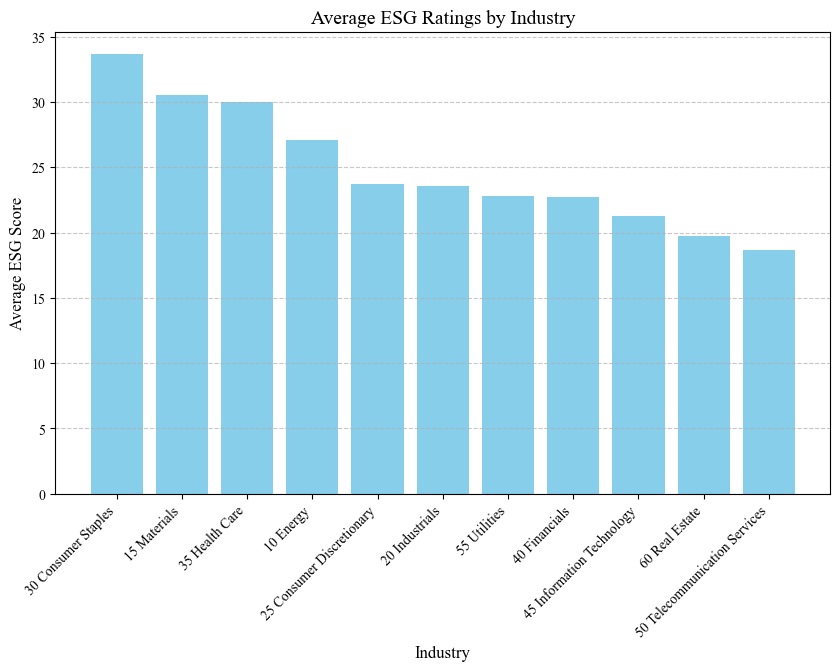

In [54]:
# Style 1
# Visualized bar chart based on industry average ESG score
plt.figure(figsize=(10,6))
plt.bar(industry_esg_rating["First Level Industry"], industry_esg_rating["Avg_ESG_Score"], color="skyblue")

plt.title("Average ESG Ratings by Industry", fontsize=14)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Average ESG Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

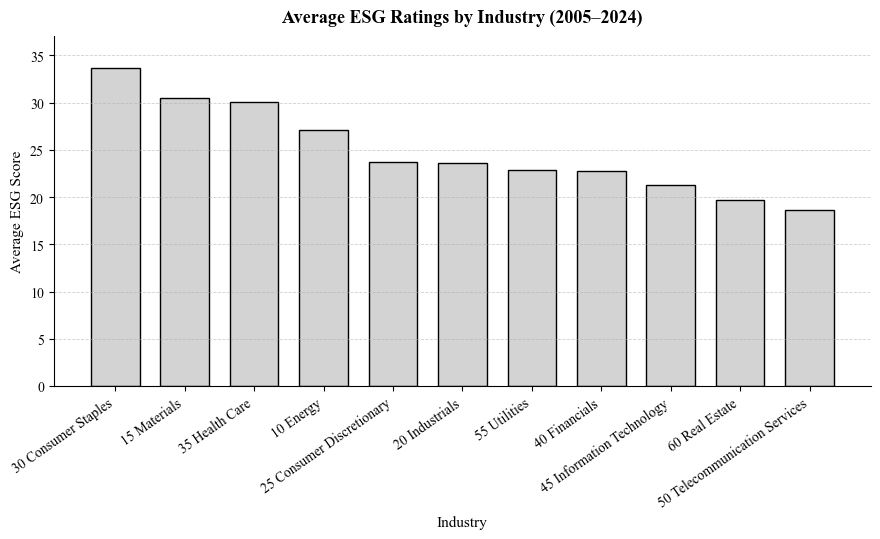

In [58]:
# Style 2

# Graphic settings
plt.figure(figsize=(9,5.5))
bars = plt.bar(
    industry_esg_rating["First Level Industry"].astype(str),
    industry_esg_rating["Avg_ESG_Score"],
    color="lightgray", edgecolor="black", width=0.7
)

# Titles and axes
plt.title("Average ESG Ratings by Industry (2005–2024)", fontsize=13, fontweight='bold', pad=10)
plt.xlabel("Industry", fontsize=11)
plt.ylabel("Average ESG Score", fontsize=11)

# Optimize x-axis labels
plt.xticks(rotation=35, ha="right", fontsize=10)

# Grid Lines
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
plt.ylim(0, max(industry_esg_rating["Avg_ESG_Score"])*1.1)

# Remove the top and right borders
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()

# plt.savefig("Figure5_Average_ESG_Rating_by_Industry.pdf", dpi=600, bbox_inches='tight')
# plt.savefig("Figure5_Average_ESG_Rating_by_Industry.png", dpi=600, bbox_inches='tight')

plt.show()


#### Yearly ESG Ratings

In [59]:
# Average ESG ratings for different years
yearly_industry_esg_rating = (
    ESG_Stock_Info
      .groupby("Year")['ESG_Score']
      .mean()
      .reset_index()
      .rename(columns={"ESG_Score": "Avg_ESG_Score"})
).sort_values("Avg_ESG_Score", ascending = False).sort_values("Year")

print("Average ESG rating for each year：")
print(yearly_industry_esg_rating)

Average ESG rating for each year：
    Year  Avg_ESG_Score
0   2007      18.743808
1   2008      21.112156
2   2009      20.827627
3   2010      18.598837
4   2011      18.884455
5   2012      22.745980
6   2013      23.766710
7   2014      23.867070
8   2015      24.552434
9   2016      24.750430
10  2017      26.001423
11  2018      27.213936
12  2019      27.318415
13  2020      27.475510
14  2021      28.692600
15  2022      31.622178


In [69]:
# Take the earliest and latest years and the average score.
start_year = yearly_industry_esg_rating["Year"].iloc[0]
end_year   = yearly_industry_esg_rating["Year"].iloc[-1]
start_val  = yearly_industry_esg_rating["Avg_ESG_Score"].iloc[0]
end_val    = yearly_industry_esg_rating["Avg_ESG_Score"].iloc[-1]

years = end_year - start_year

if years > 0 and start_val > 0:
    overall_cagr = (end_val / start_val) ** (1 / years) - 1
else:
    overall_cagr = None

print(f"Starting year: {start_year}, Ending year: {end_year}")
print(f"Starting average score: {start_val:.2f}, Ending average score: {end_val:.2f}")
print(f"Annual average growth rate (CAGR): {overall_cagr:.4f}")


Starting year: 2007, Ending year: 2022
Starting average score: 18.74, Ending average score: 31.62
Annual average growth rate (CAGR): 0.0355


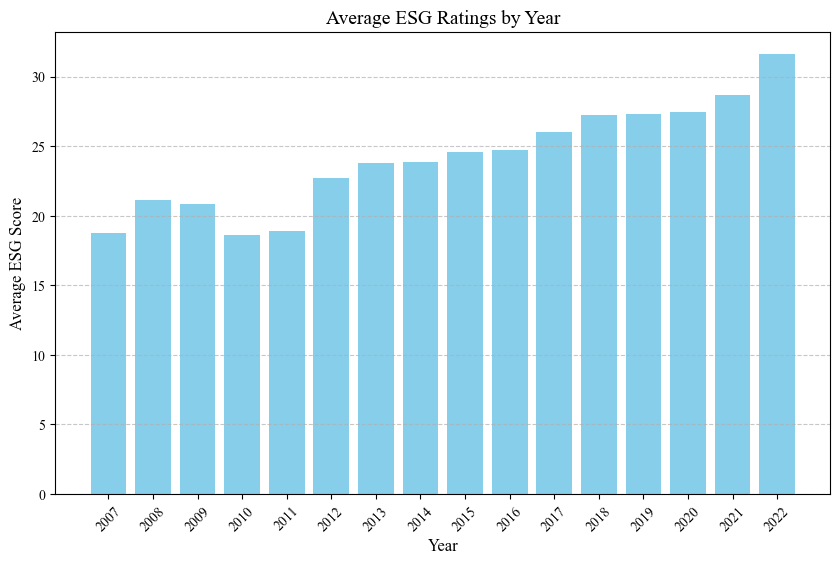

In [63]:
# Style 1
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(yearly_industry_esg_rating["Year"], yearly_industry_esg_rating["Avg_ESG_Score"], color="skyblue")

plt.title("Average ESG Ratings by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average ESG Score", fontsize=12)
plt.xticks(yearly_industry_esg_rating["Year"], rotation=45)  # Horizontal axis label year
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


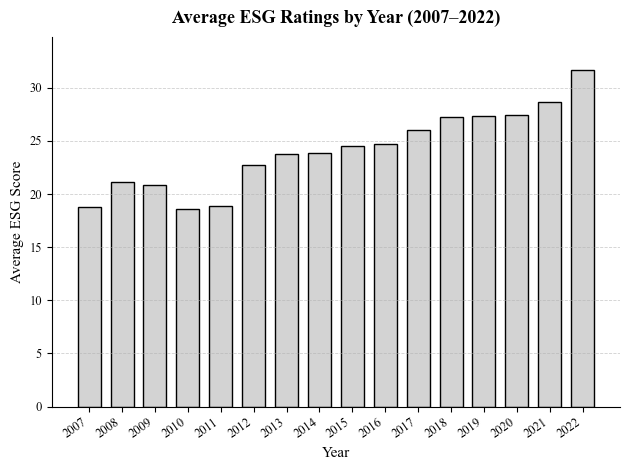

In [71]:
# Style 2

# Draw a chart 
plt.bar(
    yearly_industry_esg_rating["Year"],
    yearly_industry_esg_rating["Avg_ESG_Score"],
    color="lightgray", edgecolor="black", width=0.7
)

# Titles and Tags
plt.title("Average ESG Ratings by Year (2007–2022)", 
          fontsize=13, fontweight='bold', pad=10)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Average ESG Score", fontsize=11)

# Coordinate Scale Optimization
plt.xticks(yearly_industry_esg_rating["Year"], rotation=35, ha="right", fontsize=9)
plt.yticks(fontsize=9)

# Grid lines
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

# Simplify the border (remove the top and right borders).
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

# Leave appropriate blank space in the Y-axis range.
plt.ylim(0, yearly_industry_esg_rating["Avg_ESG_Score"].max() * 1.1)

plt.tight_layout()

# plt.savefig("Figure6_Average_ESG_Ratings_by_Year.pdf", dpi=600, bbox_inches='tight')
# plt.savefig("Figure6_Average_ESG_Ratings_by_Year.png", dpi=600, bbox_inches='tight')

plt.show()


#### ESG Ratings Across Different Years and Industries

In [77]:
# ESG ratings for different industries in different years
year_industry_esg_rating = (
    ESG_Stock_Info
      .groupby(["Year", "一级行业名称"])['ESG_Score']
      .mean()
      .reset_index()
      .rename(columns={"一级行业名称":"First Level Industry", "ESG_Score": "Avg_ESG_Score"})
)

print("Average ESG ratings for different years and industries:")
print(year_industry_esg_rating.head(10))


Average ESG ratings for different years and industries:
   Year           First Level Industry  Avg_ESG_Score
0  2007                      10 Energy      20.177175
1  2007                   15 Materials      22.454220
2  2007                 20 Industrials      16.593741
3  2007      25 Consumer Discretionary      17.243425
4  2007            30 Consumer Staples      25.748075
5  2007                 35 Health Care      23.699709
6  2007                  40 Financials      14.552180
7  2007      45 Information Technology      15.743417
8  2007  50 Telecommunication Services      16.076000
9  2007                   55 Utilities      15.742442


In [79]:
# Create a pivot table: Row = Year, Column = Industry, Value = Average ESG Score
trend_table = year_industry_esg_rating.pivot(
    index="Year",
    columns="First Level Industry",
    values="Avg_ESG_Score"
)

print("Annual ESG rating trend table for different industries:")
print(trend_table.head(5))

Annual ESG rating trend table for different industries:
First Level Industry  10 Energy  15 Materials  20 Industrials  \
Year                                                            
2007                  20.177175     22.454220       16.593741   
2008                  24.107522     23.821503       19.522342   
2009                  22.182437     24.624189       19.236038   
2010                  20.722239     22.118039       16.923974   
2011                  20.250852     22.609175       17.481304   

First Level Industry  25 Consumer Discretionary  30 Consumer Staples  \
Year                                                                   
2007                                  17.243425            25.748075   
2008                                  19.456425            27.605166   
2009                                  18.823466            27.407745   
2010                                  17.156879            24.247534   
2011                                  17.485019         

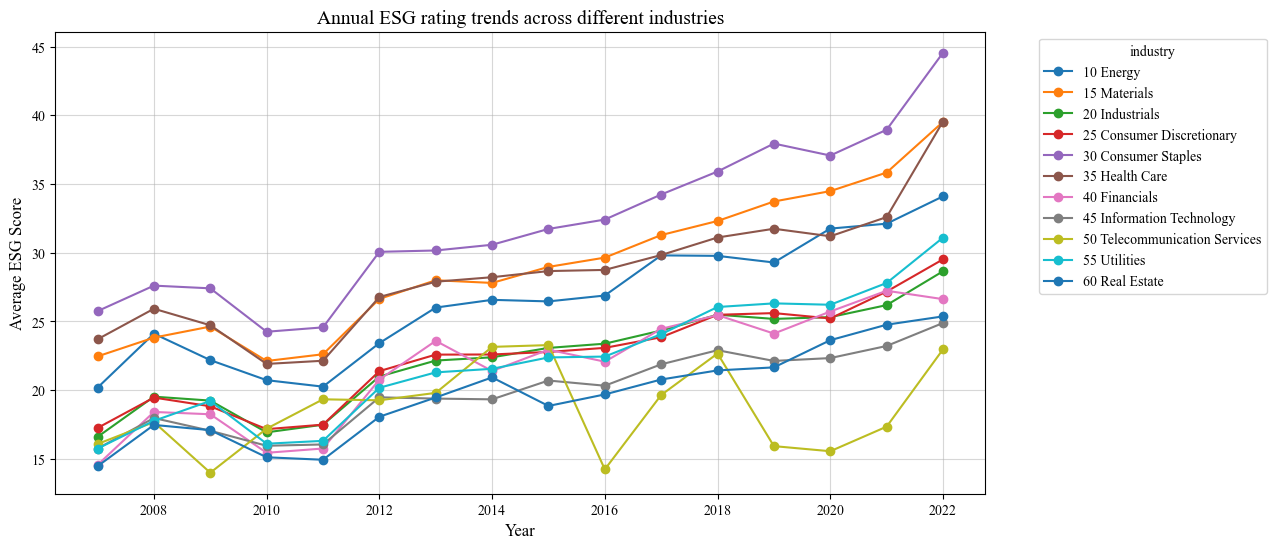

In [81]:
# Style 1
plt.figure(figsize=(12,6))
for col in trend_table.columns:
    plt.plot(trend_table.index, trend_table[col], marker="o", label=col)

plt.title("Annual ESG rating trends across different industries", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average ESG Score", fontsize=12)
plt.legend(title="industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.5)

plt.show()


C:\Users\Vicky\AppData\Local\Temp\ipykernel_72456\149035475.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{t:.0f}" for t in ax.get_yticks()], fontsize=9)


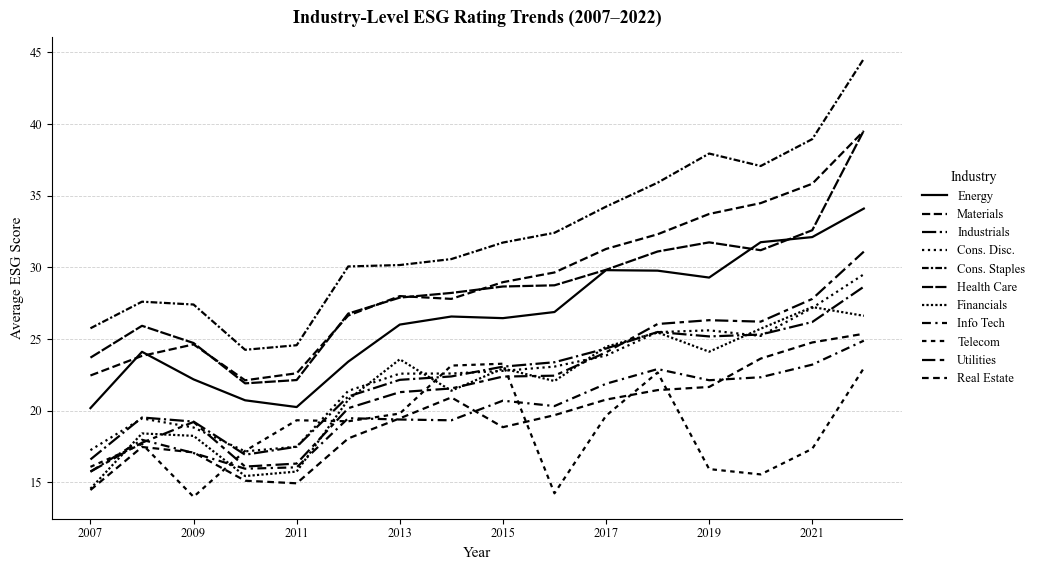

In [84]:
# Style 2
# (Optional) Map overly long industry names to abbreviations for cleaner labels.
abbr = {
    "10 Energy": "Energy",
    "15 Materials": "Materials",
    "20 Industrials": "Industrials",
    "25 Consumer Discretionary": "Cons. Disc.",
    "30 Consumer Staples": "Cons. Staples",
    "35 Health Care": "Health Care",
    "40 Financials": "Financials",
    "45 Information Technology": "Info Tech",
    "50 Telecommunication Services": "Telecom",
    "55 Utilities": "Utilities",
    "60 Real Estate": "Real Estate",
}

# If your column names contain both Chinese and English characters, the following row will automatically apply the abbreviations; otherwise, it will use the original column names.
labels = [abbr.get(c, str(c)) for c in trend_table.columns]

# Line type/marker: Black and white print friendly
linestyles = ["-", "--", "-.", ":", (0,(3,1,1,1)), (0,(5,1)), (0,(1,1)),
              (0,(4,2,1,2)), (0,(2,2)), (0,(6,2,2,2)), (0,(3,2))]
markers = [None]*11  

fig, ax = plt.subplots(figsize=(10.5,5.8))

# Draw
x = trend_table.index.astype(int)
for i, col in enumerate(trend_table.columns):
    ax.plot(
        x, trend_table[col].values,
        color="black",
        linestyle=linestyles[i % len(linestyles)],
        linewidth=1.6,
        marker=markers[i % len(markers)],
        label=labels[i]
    )

# Axis, Title, Grid
ax.set_title("Industry-Level ESG Rating Trends (2007–2022)",
             fontsize=13, fontweight="bold", pad=10)
ax.set_xlabel("Year", fontsize=11)
ax.set_ylabel("Average ESG Score", fontsize=11)

# The x-axis is updated every two years for a cleaner look.
xticks = np.arange(x.min(), x.max()+1, 2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=9)
ax.set_yticklabels([f"{t:.0f}" for t in ax.get_yticks()], fontsize=9)

ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

# Remove the top/right border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Figure Exception, Compact
leg = ax.legend(title="Industry", loc="center left",
                bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=9, ncol=1)
if leg.get_title():
    leg.get_title().set_fontsize(10)

fig.tight_layout()

# fig.savefig("Figure7_ESG_Rating_Trends_By_Industry.pdf", dpi=600, bbox_inches="tight")
# fig.savefig("Figure7_ESG_Rating_Trends_By_Industry.png", dpi=600, bbox_inches="tight")

plt.show()


#### Growth Rate of different industries' ESG score

In [86]:
# Drop Nan
trend_clean = trend_table.dropna(how="all")

growth_rates = {}
for col in trend_clean.columns:
    series = trend_clean[col].dropna()
    if len(series) > 1:
        start_year, end_year = series.index[0], series.index[-1]
        start_val, end_val = series.iloc[0], series.iloc[-1]
        years = end_year - start_year
        if years > 0 and start_val > 0:
            cagr = (end_val / start_val) ** (1 / years) - 1
            growth_rates[col] = cagr
        else:
            growth_rates[col] = np.nan
    else:
        growth_rates[col] = np.nan

# Convert to DataFrame and sort
industry_esg_growth = pd.DataFrame.from_dict(
    growth_rates, orient="index", columns=["Avg_Annual_Growth"]
).sort_values("Avg_Annual_Growth", ascending=False)

# Calculate the average growth rate of the entire industry
overall_esg_growth = industry_esg_growth["Avg_Annual_Growth"].mean()

print("Annual average ESG score growth rate for each industry:")
print(industry_esg_growth)
print("\nOverall industry average growth rate:", overall_esg_growth)

Annual average ESG score growth rate for each industry:
                               Avg_Annual_Growth
55 Utilities                            0.046432
40 Financials                           0.041084
15 Materials                            0.038416
60 Real Estate                          0.038177
30 Consumer Staples                     0.037240
20 Industrials                          0.037082
25 Consumer Discretionary               0.036489
10 Energy                               0.035611
35 Health Care                          0.034730
45 Information Technology               0.030990
50 Telecommunication Services           0.024066

Overall industry average growth rate: 0.03639255162638142


#### E, S, and G ratings of industries
E, S, and G ratings for different industries

In [148]:
# Define Style 
def set_academic_rc():
    mpl.rcParams['font.family'] = 'Times New Roman'
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.right'] = False

set_academic_rc()

# Function: Industry Overall Rating 
def industry_overall_rating(df, score_col, industry_col="一级行业名称"):
    """Overall: Average score calculated by industry"""
    out = (
        df[df[score_col].notna()]
        .groupby(industry_col, dropna=False)[score_col]
        .mean()
        .reset_index()
        .rename(columns={score_col: "AvgScore", industry_col: "First Level Industry"})
        .sort_values("AvgScore", ascending=False)
    )
    return out

def industry_yearly_rating(df, score_col, industry_col="一级行业名称"):
    """By Year: Calculate the average score by year + industry, and provide a trend pivot table."""
    tmp = (
        df[df[score_col].notna()]
        .groupby(["Year", industry_col], dropna=False)[score_col]
        .mean()
        .reset_index()
        .rename(columns={score_col: "AvgScore"})
    )
    # Convert the year to int to avoid decimal markings on the x-axis.
    tmp["Year"] = tmp["Year"].astype(int)
    trend = tmp.pivot(index="Year", columns=industry_col, values="AvgScore").sort_index()
    return tmp, trend

# Visualizing functions (journal style)
_ABBR = {
    "25 Consumer Discretionary": "Cons. Disc.",
    "30 Consumer Staples": "Cons. Staples",
    "45 Information Technology": "Info Tech",
    "50 Telecommunication Services": "Telecom",
}

def _map_label(lbl: str) -> str:
    s = str(lbl)
    return _ABBR.get(s, s)

def plot_overall_bar(df_overall,
                     title="Average Rating by Industry",
                     xcol="First Level Industry", ycol="AvgScore",
                     save=None):
    """
    Overall Bar Chart (Academic Style)
    - Grayscale Fill + Black Border (Print-Friendly for Black and White)
    - Times New Roman, Remove Top Right Border, Dashed Grid
    - Optional High-Resolution Save: save='Figure8_ESG_E.pdf' or '.png'
    """
    # Compatible with different column names
    if xcol not in df_overall.columns:
        for cand in ["Industry", "一级行业名称", "行业名称"]:
            if cand in df_overall.columns:
                xcol = cand; break
    if ycol not in df_overall.columns:
        for cand in ["AvgScore", "Average_Score", "Avg_ESG_Score"]:
            if cand in df_overall.columns:
                ycol = cand; break

    x = df_overall[xcol].map(_map_label)
    y = df_overall[ycol].values

    fig, ax = plt.subplots(figsize=(9, 5.5))
    ax.bar(x, y, color="lightgray", edgecolor="black", width=0.7)
    ax.set_title(title, fontsize=13, fontweight="bold", pad=10)
    ax.set_xlabel("Industry", fontsize=11)
    ax.set_ylabel("Average Score", fontsize=11)
    ax.set_ylim(0, max(y) * 1.12)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
    plt.xticks(rotation=35, ha="right", fontsize=9)
    plt.yticks(fontsize=9)
    fig.tight_layout()

    if save:
        fig.savefig(save, dpi=600, bbox_inches="tight")
    plt.show()


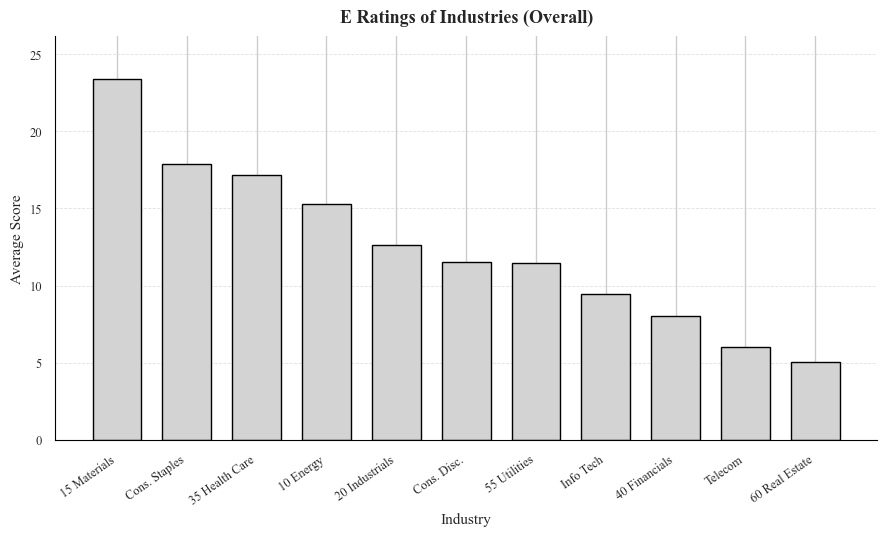

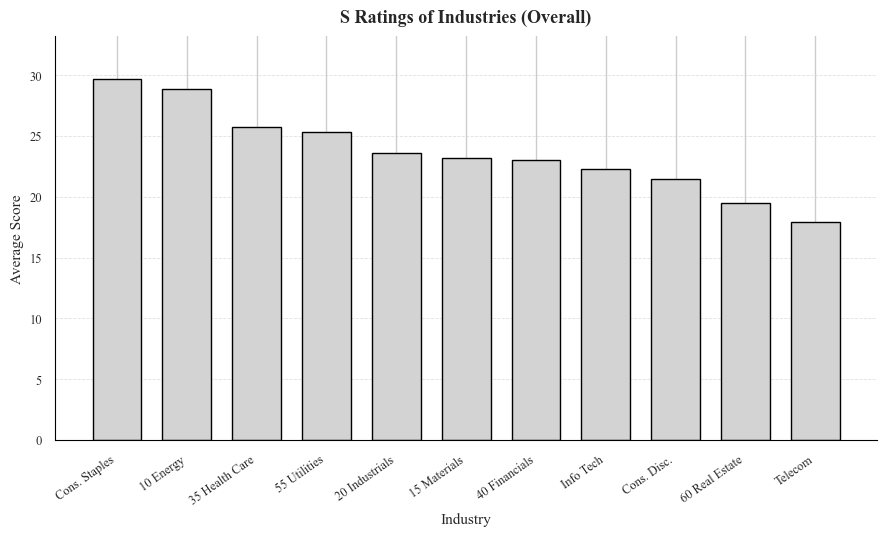

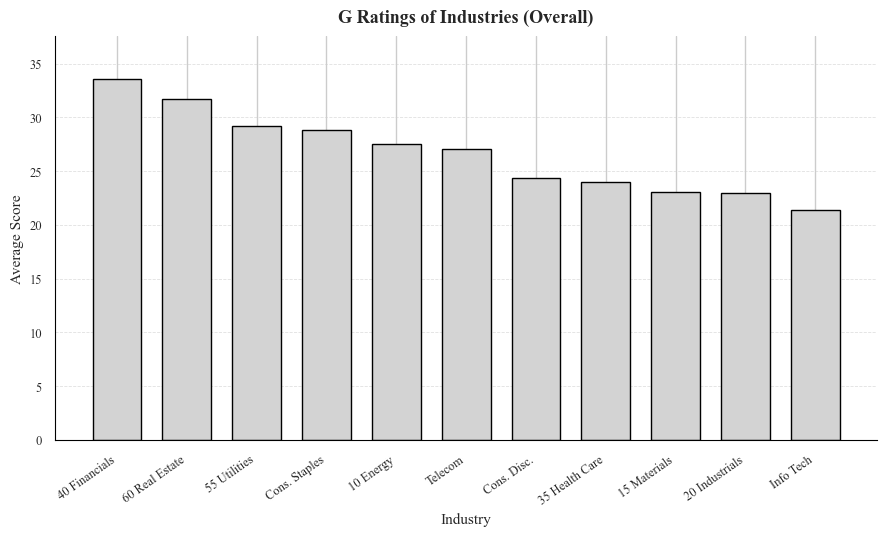

In [149]:
# E/S/G Overall Bar Chart
E_overall, _ = industry_yearly_rating(ESG_Stock_Info, "E_Score") 
E_overall = industry_overall_rating(ESG_Stock_Info, "E_Score")
plot_overall_bar(E_overall, title="E Ratings of Industries (Overall)",
                 save=None) 

S_overall = industry_overall_rating(ESG_Stock_Info, "S_Score")
plot_overall_bar(S_overall, title="S Ratings of Industries (Overall)")

G_overall = industry_overall_rating(ESG_Stock_Info, "G_Score")
plot_overall_bar(G_overall, title="G Ratings of Industries (Overall)")

# plot_yearly_trend(trend_table, title="Figure 7. Industry-Level ESG Rating Trends (2007–2022)",
#                   treat_zero_as_missing_after=2022, save=None)


In [150]:
# ESG Tables
print(" E rating of industries：E ratings (overall average) for different industries ")
print(E_overall, "\n")

print("S rating of industries：S ratings (overall average) for different industries")
print(S_overall, "\n")

print("G rating of industries：G ratings (overall average) for different industries")
print(G_overall, "\n")

 E rating of industries：E ratings (overall average) for different industries 
             First Level Industry   AvgScore
1                    15 Materials  23.374508
4             30 Consumer Staples  17.910649
5                  35 Health Care  17.179152
0                       10 Energy  15.317454
2                  20 Industrials  12.663698
3       25 Consumer Discretionary  11.539998
9                    55 Utilities  11.460410
7       45 Information Technology   9.440139
6                   40 Financials   8.062801
8   50 Telecommunication Services   6.054426
10                 60 Real Estate   5.067201 

S rating of industries：S ratings (overall average) for different industries
             First Level Industry   AvgScore
4             30 Consumer Staples  29.669199
0                       10 Energy  28.836106
5                  35 Health Care  25.739593
9                    55 Utilities  25.301047
2                  20 Industrials  23.586195
1                    15 Materials 

#### E, S, G Ratings of Industries Over Time

In [151]:

def plot_yearly_trend(trend_table,
                      title="Yearly Industry Rating Trend",
                      treat_zero_as_missing_after=2022,
                      xtick_step=2,
                      save=None):
    """
    Annual Trend Line Chart (Academic Style)
    - Line type differentiates industries (Black and White Printing Friendly)
    - Option to treat 0 for 2023/2024 as missing (due to outdated database)
    """
    tbl = trend_table.copy()
    try:
        tbl.index = tbl.index.astype(int)
    except Exception:
        pass

    # Treat late "0"s as missing (can be turned off: pass None)
    if treat_zero_as_missing_after is not None:
        mask = tbl.index >= int(treat_zero_as_missing_after + 1)
        if mask.any():
            tbl.loc[mask] = tbl.loc[mask].replace(0, np.nan)

    linestyles = ["-", "--", "-.", ":", (0,(3,1,1,1)), (0,(5,1)),
                  (0,(1,1)), (0,(4,2,1,2)), (0,(2,2)), (0,(6,2,2,2)), (0,(3,2))]

    fig, ax = plt.subplots(figsize=(10.5, 5.8))
    for i, col in enumerate(tbl.columns):
        ax.plot(
            tbl.index, tbl[col].values,
            color="black",
            linestyle=linestyles[i % len(linestyles)],
            linewidth=1.6,
            label=_map_label(col)
        )

    ax.set_title(title, fontsize=13, fontweight="bold", pad=10)
    ax.set_xlabel("Year", fontsize=11)
    ax.set_ylabel("Average Score", fontsize=11)
    # The x-axis increments every two years (xtick_step can be changed to 1/2/3).
    years = tbl.index.values
    xticks = np.arange(years.min(), years.max()+1, xtick_step)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=9)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    leg = ax.legend(title="Industry", loc="center left",
                    bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=9)
    if leg.get_title():
        leg.get_title().set_fontsize(10)

    fig.tight_layout()
    if save:
        fig.savefig(save, dpi=600, bbox_inches="tight")
    plt.show()

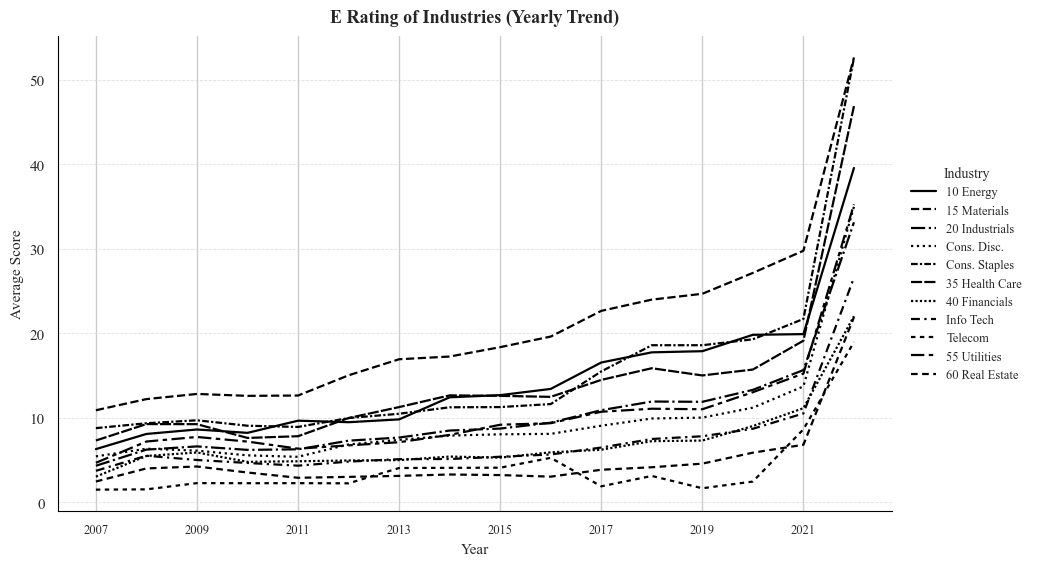

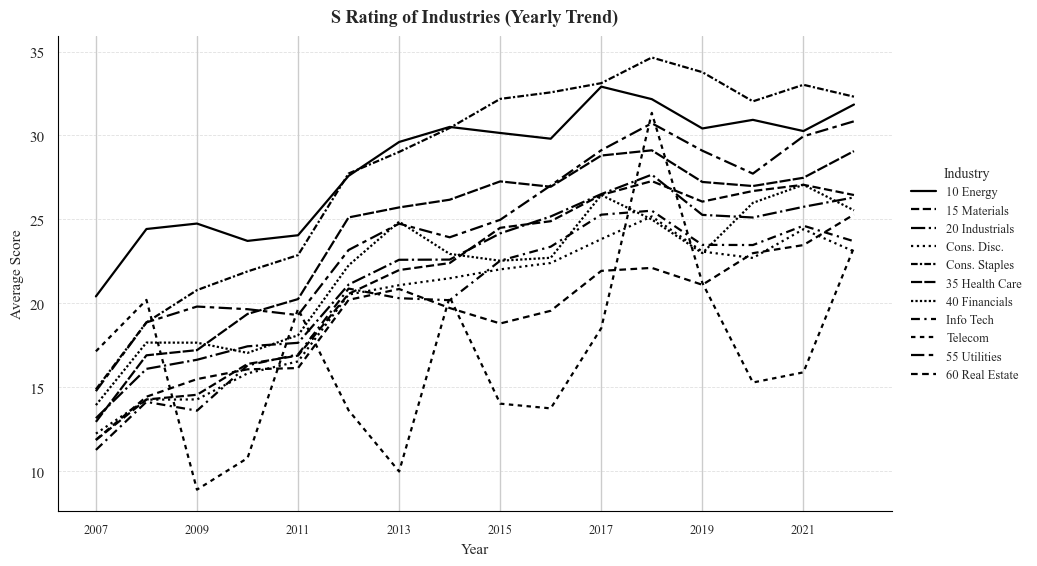

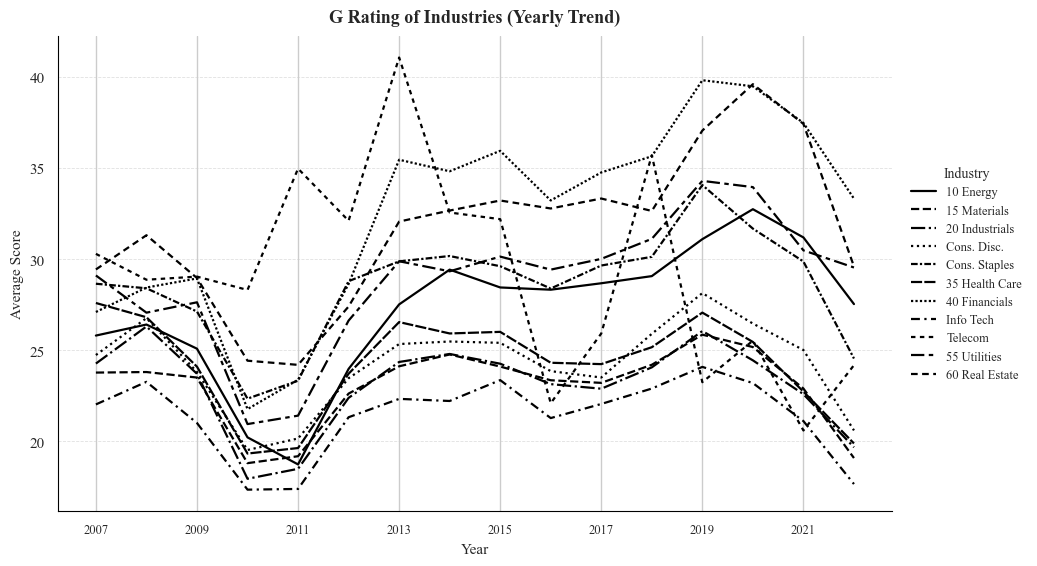

In [152]:
# Style 1
# E/S/G: By Year + Visualization
E_yearly, E_trend = industry_yearly_rating(ESG_Stock_Info, "E_Score")
plot_yearly_trend(E_trend, title="E Rating of Industries (Yearly Trend)")

S_yearly, S_trend = industry_yearly_rating(ESG_Stock_Info, "S_Score")
plot_yearly_trend(S_trend, title="S Rating of Industries (Yearly Trend)")

G_yearly, G_trend = industry_yearly_rating(ESG_Stock_Info, "G_Score")
plot_yearly_trend(G_trend, title="G Rating of Industries (Yearly Trend)")


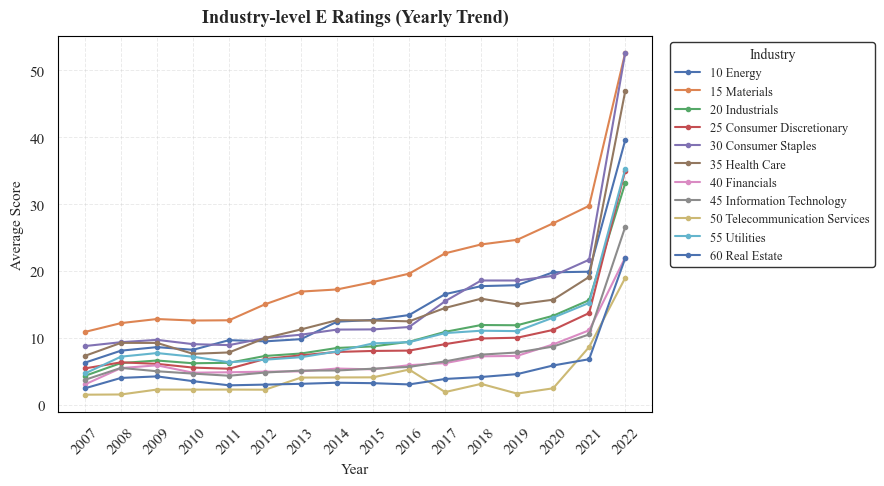

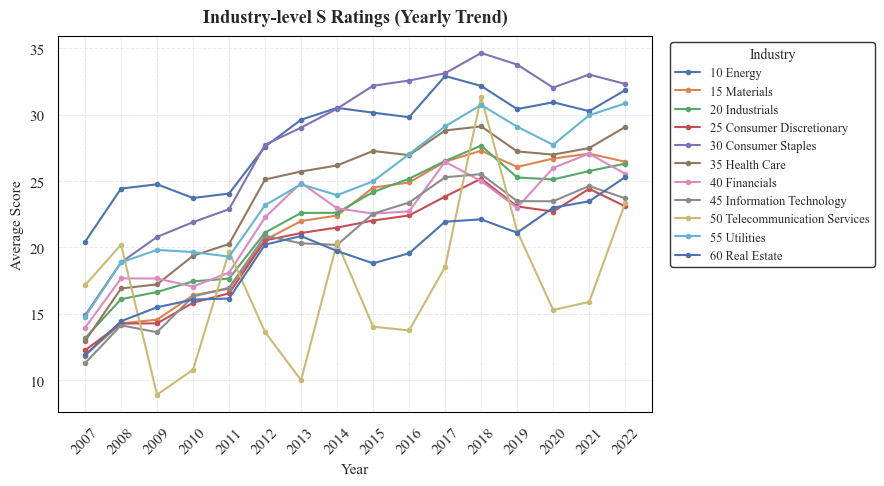

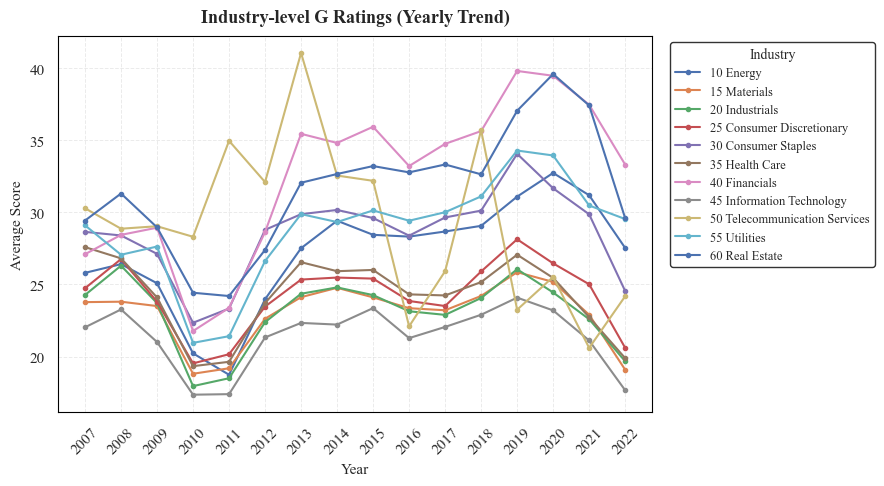

In [154]:
# Style 2

def plot_yearly_trend_academic(trend_table, title):
    """ESG Annual Trend Chart - Academic Journal Style"""
    plt.figure(figsize=(9, 5))
    for col in trend_table.columns:
        plt.plot(
            trend_table.index, trend_table[col],
            marker="o", markersize=3, linewidth=1.5, label=col
        )
    
    plt.title(title, fontsize=13, fontweight="bold", pad=10)
    plt.xlabel("Year", fontsize=11)
    plt.ylabel("Average Score", fontsize=11)
    plt.xticks(trend_table.index, rotation=45)
    plt.grid(alpha=0.4, linestyle="--", linewidth=0.7)
    plt.legend(
        title="Industry",
        bbox_to_anchor=(1.02, 1),
        loc="upper left",
        fontsize=9,
        title_fontsize=10,
        frameon=True
    )
    plt.tight_layout()
    plt.show()

# Drawing
plot_yearly_trend_academic(E_trend, "Industry-level E Ratings (Yearly Trend)")
plot_yearly_trend_academic(S_trend, "Industry-level S Ratings (Yearly Trend)")
plot_yearly_trend_academic(G_trend, "Industry-level G Ratings (Yearly Trend)")


In [160]:
# E, S, G rating tables for different years
print("E rating of industries：Annual E-rating trends across different industries")
E_trend.columns.name = None
print(E_trend, "\n")

print("S rating of industries：Annual S-rating trends across different industries")
S_trend.columns.name = None
print(S_trend, "\n")

print("G rating of industries：Annual G-rating trends across different industries")
G_trend.columns.name = None
print(G_trend, "\n")

E rating of industries：Annual E-rating trends across different industries
      10 Energy  15 Materials  20 Industrials  25 Consumer Discretionary  \
Year                                                                       
2007   6.280079     10.878295        4.310332                   5.417365   
2008   8.073630     12.198190        6.218579                   6.326975   
2009   8.601463     12.806609        6.599261                   6.096690   
2010   8.203014     12.580292        6.187460                   5.539812   
2011   9.644080     12.620077        6.256636                   5.367875   
2012   9.463215     15.012413        7.278973                   6.830419   
2013   9.796173     16.913126        7.647262                   7.375709   
2014  12.410195     17.233064        8.477694                   7.881564   
2015  12.666153     18.343538        8.710274                   8.030787   
2016  13.401625     19.596802        9.403694                   8.083139   
2017  16.52855

### E, S, G Score Distribution

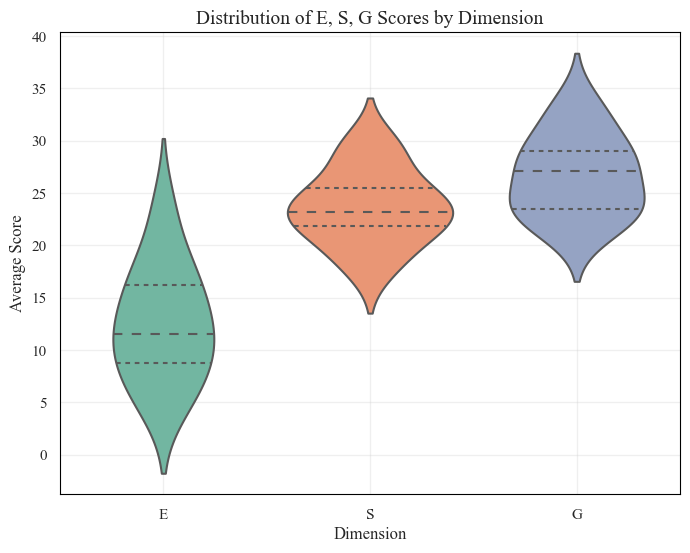

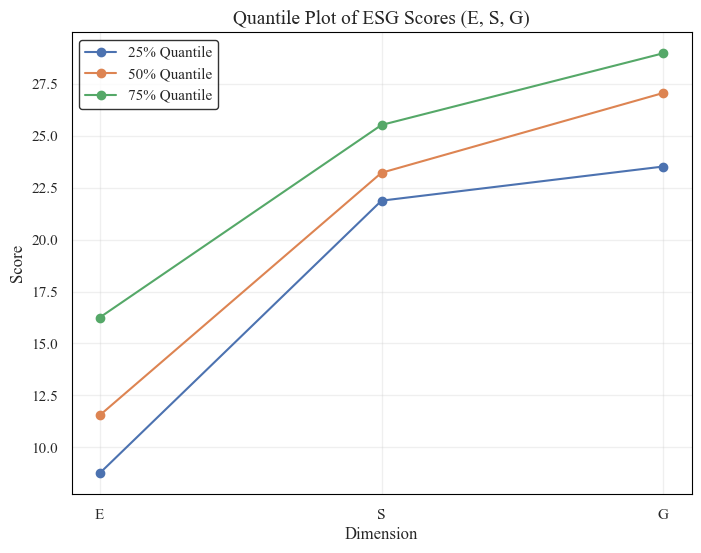

Quantile values:
         25%        50%        75%
E   8.751470  11.539998  16.248303
S  21.875492  23.219378  25.520320
G  23.519958  27.061921  28.973224


In [113]:
# Style 1
# Distribution plot
df_plot = pd.concat([
    E_overall.assign(Dimension="E"),
    S_overall.assign(Dimension="S"),
    G_overall.assign(Dimension="G")
])

# Draw a quantile plot (a violin plot can be used to show the distribution plus the median).
plt.figure(figsize=(8,6))
sns.violinplot(x="Dimension", y="AvgScore", data=df_plot, inner="quartile", palette="Set2")

plt.title("Distribution of E, S, G Scores by Dimension", fontsize=14)
plt.xlabel("Dimension", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Draw an IQR chart
# Calculate the quantiles for each dimension
quantiles = {}
for dim, df in zip(["E", "S", "G"], [E_overall, S_overall, G_overall]):
    q25 = np.percentile(df["AvgScore"], 25)
    q50 = np.percentile(df["AvgScore"], 50)  # Median
    q75 = np.percentile(df["AvgScore"], 75)
    quantiles[dim] = [q25, q50, q75]

# Convert to DataFrame
quantile_df = pd.DataFrame(quantiles, index=["25%", "50%", "75%"]).T

# Plotting quantile line graphs
plt.figure(figsize=(8,6))
for q in quantile_df.columns:
    plt.plot(quantile_df.index, quantile_df[q], marker="o", label=f"{q} Quantile")

plt.title("Quantile Plot of ESG Scores (E, S, G)", fontsize=14)
plt.xlabel("Dimension", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("Quantile values:")
print(quantile_df)



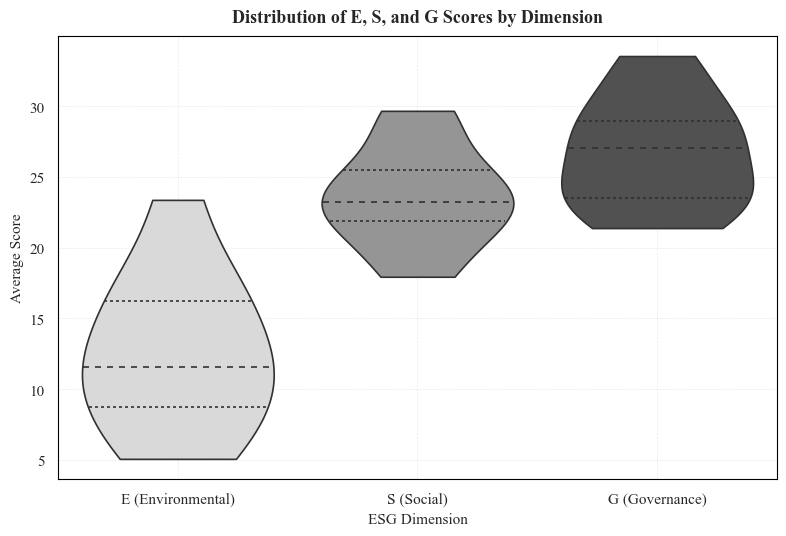

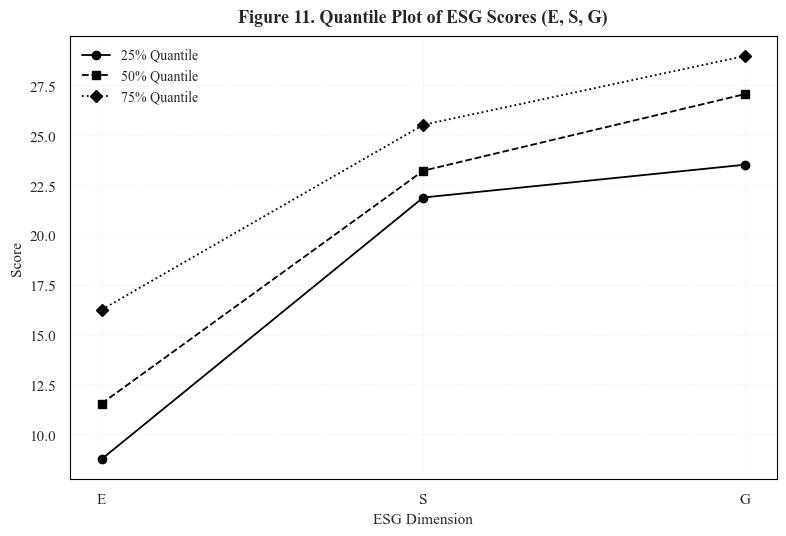

Quantile values:


,25%,50%,75%
E,8.75,11.54,16.25
S,21.88,23.22,25.52
G,23.52,27.06,28.97


In [114]:
# Style 2
# Merge E/S/G results and label dimensions
df_plot = pd.concat([
    E_overall.assign(Dimension="E (Environmental)"),
    S_overall.assign(Dimension="S (Social)"),
    G_overall.assign(Dimension="G (Governance)")
])

# Violin Plot 
plt.figure(figsize=(8, 5.5))
sns.violinplot(
    x="Dimension", y="AvgScore", data=df_plot,
    inner="quartile", palette="Greys", 
    linewidth=1.2, cut=0, scale="width"
)

plt.title("Distribution of E, S, and G Scores by Dimension", fontsize=13, fontweight='bold', pad=10)
plt.xlabel("ESG Dimension", fontsize=11)
plt.ylabel("Average Score", fontsize=11)
plt.grid(alpha=0.4, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


# Calculate the quantiles for each dimension
quantiles = {}
for dim, df in zip(["E", "S", "G"], [E_overall, S_overall, G_overall]):
    q25 = np.percentile(df["AvgScore"], 25)
    q50 = np.percentile(df["AvgScore"], 50)
    q75 = np.percentile(df["AvgScore"], 75)
    quantiles[dim] = [q25, q50, q75]

quantile_df = pd.DataFrame(quantiles, index=["25%", "50%", "75%"]).T

# Line Chart
plt.figure(figsize=(8, 5.5))
markers = ['o', 's', 'D']
linestyles = ['-', '--', ':']

for q, m, ls in zip(quantile_df.columns, markers, linestyles):
    plt.plot(
        quantile_df.index,
        quantile_df[q],
        marker=m,
        label=f"{q} Quantile",
        linestyle=ls,
        color='black',
        linewidth=1.3,
        markersize=6
    )

plt.title("Figure 11. Quantile Plot of ESG Scores (E, S, G)", fontsize=13, fontweight='bold', pad=10)
plt.xlabel("ESG Dimension", fontsize=11)
plt.ylabel("Score", fontsize=11)
plt.legend(frameon=False, fontsize=10)
plt.grid(alpha=0.3, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

print("Quantile values:")
display(quantile_df.round(2))


### Ranking Test

#### Ranking Table

In [162]:
# ESG Ranking Table
print("E rating of industries：E-rating rankings for different industries (overall average)")
E_rank_overall = E_overall.copy()
E_rank_overall.rename({"一级行业名称":"First-Level Industry Rank"})
E_rank_overall["Rank"] = E_rank_overall["AvgScore"].rank(ascending=False, method="min")
print(E_rank_overall.sort_values("Rank"), "\n")

print("S rating of industries：S-rating rankings for different industries (overall average)")
S_rank_overall = S_overall.copy()
S_rank_overall.rename({"一级行业名称":"First-Level Industry Rank"})
S_rank_overall["Rank"] = S_rank_overall["AvgScore"].rank(ascending=False, method="min")
print(S_rank_overall.sort_values("Rank"), "\n")

print("G rating of industries：G-rating rankings for different industries (overall average)")
G_rank_overall = G_overall.copy()
G_rank_overall.rename({"一级行业名称":"First-Level Industry Rank"})
G_rank_overall["Rank"] = G_rank_overall["AvgScore"].rank(ascending=False, method="min")
print(G_rank_overall.sort_values("Rank"), "\n")


E rating of industries：E-rating rankings for different industries (overall average)
             First Level Industry   AvgScore  Rank
1                    15 Materials  23.374508   1.0
4             30 Consumer Staples  17.910649   2.0
5                  35 Health Care  17.179152   3.0
0                       10 Energy  15.317454   4.0
2                  20 Industrials  12.663698   5.0
3       25 Consumer Discretionary  11.539998   6.0
9                    55 Utilities  11.460410   7.0
7       45 Information Technology   9.440139   8.0
6                   40 Financials   8.062801   9.0
8   50 Telecommunication Services   6.054426  10.0
10                 60 Real Estate   5.067201  11.0 

S rating of industries：S-rating rankings for different industries (overall average)
             First Level Industry   AvgScore  Rank
4             30 Consumer Staples  29.669199   1.0
0                       10 Energy  28.836106   2.0
5                  35 Health Care  25.739593   3.0
9             

#### Spearman and Kendall Test

In [117]:
# Merge E/S/G rankings into one table
rank_df = E_rank_overall[["一级行业名称", "Rank"]].rename(columns={"Rank": "E_rank"})
rank_df = rank_df.merge(S_rank_overall[["一级行业名称", "Rank"]].rename(columns={"Rank": "S_rank"}), on="一级行业名称")
rank_df = rank_df.merge(G_rank_overall[["一级行业名称", "Rank"]].rename(columns={"Rank": "G_rank"}), on="一级行业名称")

# Spearman 
print("=== Spearman Rank Correlation ===")
print(rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="spearman"), "\n")

# Kendall Tau 
print("=== Kendall Tau Rank Correlation ===")
print(rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="kendall"), "\n")

# Spearman Test
rho_es, p_es = spearmanr(rank_df["E_rank"], rank_df["S_rank"])
rho_eg, p_eg = spearmanr(rank_df["E_rank"], rank_df["G_rank"])
rho_sg, p_sg = spearmanr(rank_df["S_rank"], rank_df["G_rank"])

print(f"Spearman E vs S: rho={rho_es:.3f}, p={p_es:.3f}")
print(f"Spearman E vs G: rho={rho_eg:.3f}, p={p_eg:.3f}")
print(f"Spearman S vs G: rho={rho_sg:.3f}, p={p_sg:.3f}\n")

# Kendall Test
tau_es, p_es_k = kendalltau(rank_df["E_rank"], rank_df["S_rank"])
tau_eg, p_eg_k = kendalltau(rank_df["E_rank"], rank_df["G_rank"])
tau_sg, p_sg_k = kendalltau(rank_df["S_rank"], rank_df["G_rank"])

print(f"Kendall E vs S: tau={tau_es:.3f}, p={p_es_k:.3f}")
print(f"Kendall E vs G: tau={tau_eg:.3f}, p={p_eg_k:.3f}")
print(f"Kendall S vs G: tau={tau_sg:.3f}, p={p_sg_k:.3f}")


=== Spearman Rank Correlation ===
          E_rank    S_rank    G_rank
E_rank  1.000000  0.754545 -0.390909
S_rank  0.754545  1.000000  0.018182
G_rank -0.390909  0.018182  1.000000 

=== Kendall Tau Rank Correlation ===
          E_rank    S_rank    G_rank
E_rank  1.000000  0.563636 -0.272727
S_rank  0.563636  1.000000  0.018182
G_rank -0.272727  0.018182  1.000000 

Spearman E vs S: rho=0.755, p=0.007
Spearman E vs G: rho=-0.391, p=0.235
Spearman S vs G: rho=0.018, p=0.958

Kendall E vs S: tau=0.564, p=0.017
Kendall E vs G: tau=-0.273, p=0.283
Kendall S vs G: tau=0.018, p=1.000


In [163]:
# Merge ranking data (retain industry name + average score and ranking for each dimension)
def _std_cols(df, score_col="AvgScore", name_col="一级行业名称", rank_col="Rank", prefix="E"):
    keep = {}
    # Automatic cover
    if name_col not in df.columns:
        # Compatible with English
        name_col = "Industry" if "Industry" in df.columns else df.columns[0]
    if score_col not in df.columns:
        score_col = [c for c in df.columns if "Avg" in c or "Score" in c][0]
    if rank_col not in df.columns:
        rank_col = [c for c in df.columns if "Rank" in c][0]
    keep[f"{prefix}_score"] = df[score_col].astype(float).values
    keep[f"{prefix}_rank"] = df[rank_col].astype(int).values
    keep["Industry"] = df[name_col].values
    out = pd.DataFrame(keep)
    return out[["Industry", f"{prefix}_score", f"{prefix}_rank"]]

E_std = _std_cols(E_rank_overall, prefix="E")
S_std = _std_cols(S_rank_overall, prefix="S")
G_std = _std_cols(G_rank_overall, prefix="G")

rank_df = (
    E_std.merge(S_std, on="Industry").merge(G_std, on="Industry")
    .sort_values("E_rank")
    .reset_index(drop=True)
)

# Correlation matrix (Spearman & Kendall)
corr_s = rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="spearman")
corr_k = rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="kendall")

print("Spearman Rank Correlation Matrix ")
print(corr_s.round(3), "\n")
print("Kendall Tau Rank Correlation Matrix")
print(corr_k.round(3), "\n")

# Summary table of pairwise correlations (including rho/tau, p-value, significance)
pairs = [("E_rank","S_rank"), ("E_rank","G_rank"), ("S_rank","G_rank")]

def p_stars(p):
    return "***" if p < 0.01 else "**" if p < 0.05 else "*" if p < 0.1 else ""

rows = []
for a,b in pairs:
    rho,  p_r = spearmanr(rank_df[a], rank_df[b])
    tau,  p_t = kendalltau(rank_df[a], rank_df[b])
    rows.append({
        "Pair": f"{a.replace('_rank','')} vs {b.replace('_rank','')}",
        "Spearman_rho": rho, "Spearman_p": p_r, "Spearman_sig": p_stars(p_r),
        "Kendall_tau": tau, "Kendall_p": p_t, "Kendall_sig": p_stars(p_t),
        "N_industries": rank_df.shape[0]
    })
pair_summary = pd.DataFrame(rows)
print("Pairwise Rank Correlation Summary")
print(pair_summary.round(3), "\n")

# Kendall’s W (Overall Consistency Test, ranking industries based on three dimensions)
# W = 12 * sum_i (R_i - Rbar)^2 / (m^2 * (n^3 - n)), m = number of judges (3 dimensions), n = number of objects to be ranked (number of industries)
R = rank_df[["E_rank","S_rank","G_rank"]].values   # n x m
n, m = R.shape
R_i = R.sum(axis=1)                  # Overall rankings for each industry
Rbar = R_i.mean()
S = np.sum((R_i - Rbar)**2)
W = 12*S / (m**2 * (n**3 - n))
# Chi-square Test：chi2 = m*(n-1)*W, df = n-1
chi2_stat = m*(n-1)*W
p_w = 1 - chi2.cdf(chi2_stat, df=n-1)

print(f"Kendall's W (overall concordance across E/S/G): W={W:.3f}, chi2={chi2_stat:.3f}, df={n-1}, p={p_w:.3f}\n")


Spearman Rank Correlation Matrix 
        E_rank  S_rank  G_rank
E_rank   1.000   0.755  -0.391
S_rank   0.755   1.000   0.018
G_rank  -0.391   0.018   1.000 

Kendall Tau Rank Correlation Matrix
        E_rank  S_rank  G_rank
E_rank   1.000   0.564  -0.273
S_rank   0.564   1.000   0.018
G_rank  -0.273   0.018   1.000 

Pairwise Rank Correlation Summary
     Pair  Spearman_rho  Spearman_p Spearman_sig  Kendall_tau  Kendall_p  \
0  E vs S         0.755       0.007          ***        0.564      0.017   
1  E vs G        -0.391       0.235                    -0.273      0.283   
2  S vs G         0.018       0.958                     0.018      1.000   

  Kendall_sig  N_industries  
0          **            11  
1                        11  
2                        11   

Kendall's W (overall concordance across E/S/G): W=0.418, chi2=12.545, df=10, p=0.250



#### Ranking Heatmap

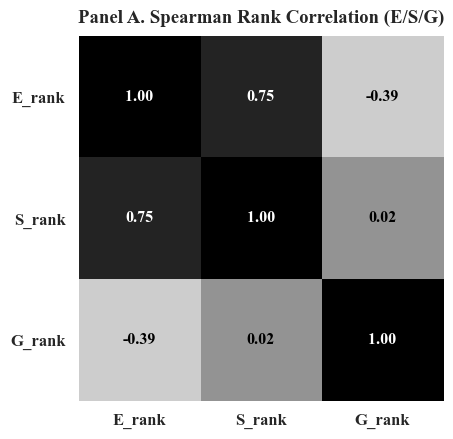

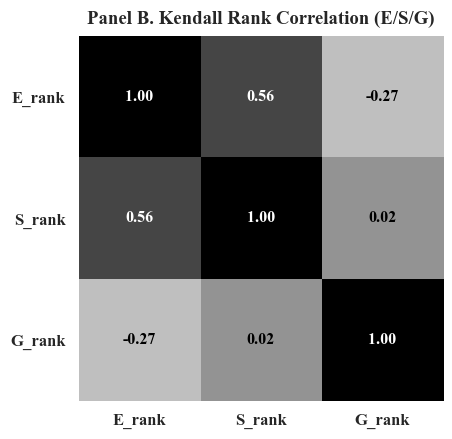

In [123]:
# Style 1
def corr_heatmap(M, title, fig_label=None):
    fig, ax = plt.subplots(figsize=(5.2, 4.5))

    im = ax.imshow(M.values, cmap="Greys", vmin=-1, vmax=1)

    ax.set_xticks(range(M.shape[1]))
    ax.set_xticklabels(M.columns, fontsize=12, fontweight="bold")
    ax.set_yticks(range(M.shape[0]))
    ax.set_yticklabels(M.index, fontsize=12, fontweight="bold")

    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            val = M.values[i, j]
            color = "black" if abs(val) < 0.5 else "white"
            ax.text(
                j, i, f"{val:.2f}",
                ha="center", va="center",
                fontsize=11.5, color=color, fontweight="semibold"
            )

    # Titles
    if fig_label:
        ax.set_title(
            f"Figure {fig_label}. {title}",
            fontsize=13.5, fontweight="bold", pad=10
        )
    else:
        ax.set_title(title, fontsize=13.5, fontweight="bold", pad=10)

    # Adjust borders and grid
    ax.spines[:].set_visible(False)
    ax.tick_params(axis="x", rotation=0)
    ax.grid(False)

    # Ensure the matrix is ​​squared.
    ax.set_aspect("equal")
    fig.tight_layout(pad=1.0)
    plt.show()

corr_heatmap(corr_s, "Panel A. Spearman Rank Correlation (E/S/G)")
corr_heatmap(corr_k, "Panel B. Kendall Rank Correlation (E/S/G)")

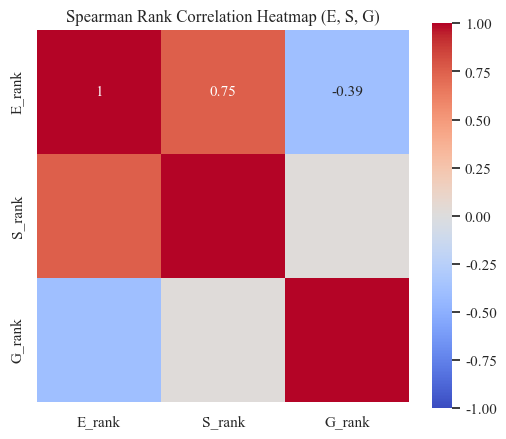

In [124]:
# Style 2
corr_matrix = rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="spearman")

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1, square=True, cbar=True)
plt.title("Spearman Rank Correlation Heatmap (E, S, G)")
plt.show()


In [129]:
print(rank_df)

                         Industry    E_score  E_rank    S_score  S_rank  \
0                    15 Materials  23.374508       1  23.219378       6   
1             30 Consumer Staples  17.910649       2  29.669199       1   
2                  35 Health Care  17.179152       3  25.739593       3   
3                       10 Energy  15.317454       4  28.836106       2   
4                  20 Industrials  12.663698       5  23.586195       5   
5       25 Consumer Discretionary  11.539998       6  21.476153       9   
6                    55 Utilities  11.460410       7  25.301047       4   
7       45 Information Technology   9.440139       8  22.274831       8   
8                   40 Financials   8.062801       9  23.001061       7   
9   50 Telecommunication Services   6.054426      10  17.941357      11   
10                 60 Real Estate   5.067201      11  19.508270      10   

      G_score  G_rank  Avg_rank  Rank_std  Rank_range  
0   23.024634       9      5.33      4.04  

#### Ranking Distribution: Variance and Range

In [164]:
# Calculate the ranking variance and range for each industry.
rank_df["Avg_rank"] = rank_df[["E_rank", "S_rank", "G_rank"]].mean(axis=1).round(2)
rank_df["Rank_std"] = rank_df[["E_rank", "S_rank", "G_rank"]].std(axis=1).round(2)
rank_df["Rank_range"] = rank_df[["E_rank", "S_rank", "G_rank"]].max(axis=1) - \
                        rank_df[["E_rank", "S_rank", "G_rank"]].min(axis=1)

# Sort and identify industries with the highest/lowest consistency.
result = rank_df.sort_values("Rank_std")

print("Industry ranking consistency (variance & range)")
print(result[["Industry", "Rank_std", "Rank_range", "Avg_rank"]])


Industry ranking consistency (variance & range)
                         Industry  Rank_std  Rank_range  Avg_rank
1             30 Consumer Staples      1.53           3      2.33
3                       10 Energy      1.53           3      3.67
5       25 Consumer Discretionary      1.53           3      7.33
7       45 Information Technology      1.73           3      9.00
6                    55 Utilities      2.08           4      4.67
9   50 Telecommunication Services      2.65           5      9.00
2                  35 Health Care      2.89           5      4.67
4                  20 Industrials      2.89           5      6.67
0                    15 Materials      4.04           8      5.33
8                   40 Financials      4.16           8      5.67
10                 60 Real Estate      4.93           9      7.67


In [165]:
# From score to Rank
# Rankings are calculated by row (within each year, higher score = rank 1).
E_rank = E_trend.rank(axis=1, ascending=False, method="min")
S_rank = S_trend.rank(axis=1, ascending=False, method="min")
G_rank = G_trend.rank(axis=1, ascending=False, method="min")

print("E rating ranks by industry ")
print(E_rank, "\n")

print("S rating ranks by industry")
print(S_rank, "\n")

print("G rating ranks by industry")
print(G_rank, "\n")


E rating ranks by industry 
      10 Energy  15 Materials  20 Industrials  25 Consumer Discretionary  \
Year                                                                       
2007        4.0           1.0             7.0                        5.0   
2008        4.0           1.0             7.0                        6.0   
2009        4.0           1.0             6.0                        7.0   
2010        3.0           1.0             6.0                        7.0   
2011        2.0           1.0             6.0                        7.0   
2012        4.0           1.0             5.0                        6.0   
2013        4.0           1.0             5.0                        6.0   
2014        3.0           1.0             5.0                        7.0   
2015        2.0           1.0             6.0                        7.0   
2016        2.0           1.0             5.0                        7.0   
2017        2.0           1.0             5.0               

#### Rank Stability

In [178]:
# Rank Stability Function 
def rank_stability(rank_df: pd.DataFrame, name: str):
    """
    rank_df: Row = Year, Column = Industry, Value = Rank for that year (1 = Best)
    Returns: Stability index for each industry across years
    """
    out = []
    for col in rank_df.columns:
        r = rank_df[col].dropna()  # If there are no rankings for some years, discard them first.
        # Variance/Standard Deviation (the smaller the value, the more stable the data)
        var_pop = np.var(r.values, ddof=0)          # Total Variance
        std_pop = np.std(r.values, ddof=0)          # Total SD
        # Range (lower values indicate greater stability)
        r_range = r.max() - r.min()
        # Entropy (based on the frequency of each rank; lower values indicate greater stability).
        p = r.value_counts(normalize=True).sort_index()
        H = entropy(p.values, base=2)               
        out.append([col, var_pop, std_pop, r_range, H])

    res = pd.DataFrame(out, columns=["一级行业名称", 
                                     f"{name}_Var", 
                                     f"{name}_Std", 
                                     f"{name}_Range", 
                                     f"{name}_Entropy_bits"]).rename(columns={"一级行业名称":"First Level Industry"})
    return res

In [181]:
# Calculate Stability
E_stab = rank_stability(E_rank, "E")
S_stab = rank_stability(S_rank, "S")
G_stab = rank_stability(G_rank, "G")

# Combined into a single "master table"
stab_all = (
    E_stab.merge(S_stab, on="First Level Industry")
          .merge(G_stab, on="First Level Industry")
)

# Organize column order and number format.
cols = ["First Level Industry",
        "E_Std","S_Std","G_Std",
        "E_Range","S_Range","G_Range",
        "E_Entropy_bits","S_Entropy_bits","G_Entropy_bits"]
stab_table = stab_all.rename(columns={
    "E_Std":"E_Std","S_Std":"S_Std","G_Std":"G_Std",
    "E_Range":"E_Range","S_Range":"S_Range","G_Range":"G_Range",
    "E_Entropy_bits":"E_Entropy_bits",
    "S_Entropy_bits":"S_Entropy_bits",
    "G_Entropy_bits":"G_Entropy_bits"
})[cols].copy()

# Rounding
for c in ["E_Std","S_Std","G_Std","E_Entropy_bits","S_Entropy_bits","G_Entropy_bits"]:
    stab_table[c] = stab_table[c].astype(float).round(3)
for c in ["E_Range","S_Range","G_Range"]:
    stab_table[c] = stab_table[c].astype(float).round(0).astype(int)

# Sort (can be sorted by stability: first by the sum of total Std, then by the sum of total Range)
stab_table["Std_sum"]   = stab_table[["E_Std","S_Std","G_Std"]].sum(axis=1)
stab_table["Range_sum"] = stab_table[["E_Range","S_Range","G_Range"]].sum(axis=1)
stab_table = stab_table.rename(columns={"一级行业名称":"First Level Industry"}) 
stab_table = stab_table.sort_values(["Std_sum","Range_sum","First Level Industry"]).drop(columns=["Std_sum","Range_sum"]).reset_index(drop=True)

print(stab_table)

             First Level Industry  E_Std  S_Std  G_Std  E_Range  S_Range  \
0                  20 Industrials  0.781  0.658  0.583        2        2   
1       45 Information Technology  0.500  1.368  0.331        1        4   
2       25 Consumer Discretionary  0.599  0.857  0.808        2        3   
3                    55 Utilities  0.661  0.696  0.935        2        2   
4             30 Consumer Staples  0.768  0.704  0.829        2        2   
5                  60 Real Estate  0.464  1.171  0.696        1        4   
6                    15 Materials  0.000  1.590  0.882        0        5   
7                  35 Health Care  0.750  1.111  0.827        2        4   
8                       10 Energy  0.827  0.496  1.446        2        1   
9                   40 Financials  0.500  1.685  1.379        1        6   
10  50 Telecommunication Services  0.464  3.495  3.706        1        9   

    G_Range  E_Entropy_bits  S_Entropy_bits  G_Entropy_bits  
0         2           1.4

In [184]:
# The most stable/most unstable industries
def show_top_bottom(df, col, k=5):
    print(f" {col} the most stable (top {k}, smaller values ​​indicate greater stability)")
    print(df.sort_values(col).head(k)[["First Level Industry", col]])
    print(f"\n{col} the most unstable (last {k})")
    print(df.sort_values(col, ascending=False).head(k)[["First Level Industry", col]])

show_top_bottom(E_stab, "E_Var")
show_top_bottom(S_stab, "S_Var")
show_top_bottom(G_stab, "G_Var")

# Composite stability score (lower scores indicate greater stability), a simple weighted average method is used
weights = {"Var": 0.5, "Range": 0.25, "Entropy_bits": 0.25}  
combo = stab_all.copy()
combo["Stability_Score"] = (
    weights["Var"]   * (combo["E_Var"] + combo["S_Var"] + combo["G_Var"]) / 3
  + weights["Range"] * (combo["E_Range"] + combo["S_Range"] + combo["G_Range"]) / 3
  + weights["Entropy_bits"] * (combo["E_Entropy_bits"] + combo["S_Entropy_bits"] + combo["G_Entropy_bits"]) / 3
)
print("\nOverall stability (lower values ​​indicate greater stability)=")
print(combo[["First Level Industry","Stability_Score"]].sort_values("Stability_Score").head(10))


 E_Var the most stable (top 5, smaller values ​​indicate greater stability)
             First Level Industry     E_Var
1                    15 Materials  0.000000
8   50 Telecommunication Services  0.214844
10                 60 Real Estate  0.214844
6                   40 Financials  0.250000
7       45 Information Technology  0.250000

E_Var the most unstable (last 5)
  First Level Industry     E_Var
0            10 Energy  0.683594
2       20 Industrials  0.609375
4  30 Consumer Staples  0.589844
5       35 Health Care  0.562500
9         55 Utilities  0.437500
 S_Var the most stable (top 5, smaller values ​​indicate greater stability)
        First Level Industry     S_Var
0                  10 Energy  0.246094
2             20 Industrials  0.433594
9               55 Utilities  0.484375
4        30 Consumer Staples  0.496094
3  25 Consumer Discretionary  0.734375

S_Var the most unstable (last 5)
             First Level Industry      S_Var
8   50 Telecommunication Services  12.2